# Visualisation to explore the relationship between supply, demand and price

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import pymc3 as pm
from statsmodels.graphics.tsaplots import plot_acf

/Users/b1017579/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## UK Gas Demand vs Price 

In [2]:
gas = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/data/raw/fuel/supply_demand/uk_gas_demand_cost.csv')
gas_drop_na = gas.dropna()
gas_drop_na.head()

,year,demand,price
0,1993,81848.0,0.009919
1,1994,117606.0,0.009254
2,1995,154393.0,0.008706
3,1996,201969.0,0.008170
4,1997,251822.0,0.008357


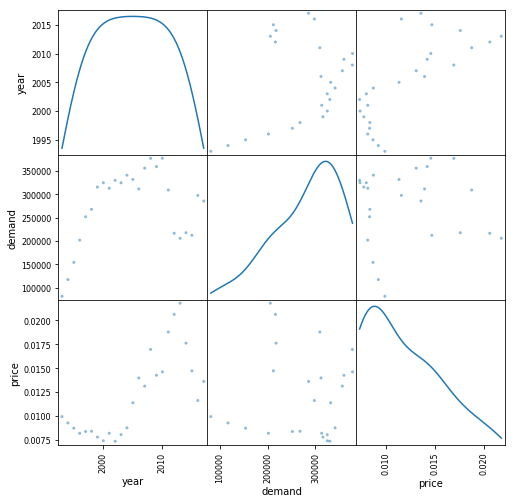

In [3]:
scatter_matrix(gas_drop_na, figsize = (8, 8), diagonal = 'kde')
plt.show()

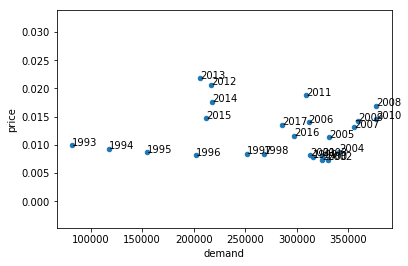

In [4]:
ax = gas_drop_na.plot.scatter(x='demand', y='price')
for i, txt in enumerate(gas_drop_na.year):
    ax.annotate(txt, (gas_drop_na.demand.iat[i],gas_drop_na.price.iat[i]))
plt.show()

## Europe Gas Demand vs Price

In [5]:
world_gas = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/data/raw/fuel/supply_demand/gas_demand_cost_europe.csv')
world_gas = world_gas[world_gas.year!='Source']
world_gas = world_gas.apply(lambda x: pd.to_numeric(x), axis=1)
world_gas.head()

,year,europe_demand,CIS_demand,northamerica_demand,asia_demand,africa_demand,middle_east,pacific_demand,latam_demand,uk_price
1,1996.0,469.0,704.0,707.0,226.0,46.0,137.0,26.0,107.0,1.866
2,1997.0,466.0,716.0,729.0,246.0,48.0,148.0,26.0,115.0,1.957
3,1998.0,477.0,679.0,713.0,255.0,50.0,157.0,27.0,125.0,1.865
4,1999.0,494.0,651.0,722.0,274.0,55.0,168.0,28.0,126.0,1.579
5,2000.0,508.0,567.0,753.0,286.0,57.0,174.0,29.0,135.0,2.711


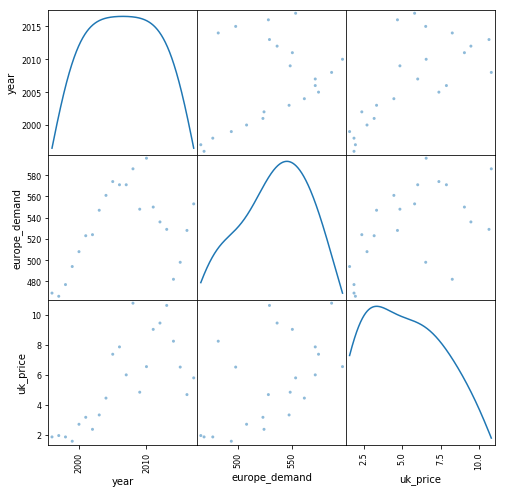

In [6]:
europe_gas = world_gas[['year','europe_demand','uk_price']]
scatter_matrix(europe_gas, figsize = (8, 8), diagonal = 'kde')
plt.show()

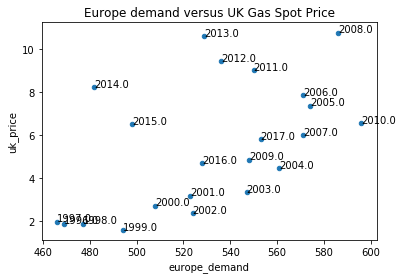

In [7]:
ax = europe_gas.plot.scatter(x='europe_demand', y='uk_price')
for i, txt in enumerate(europe_gas.year):
    ax.annotate(txt, (europe_gas.europe_demand.iat[i],europe_gas.uk_price.iat[i]))
    plt.title('Europe demand versus UK Gas Spot Price')
plt.show()

# World Gas Demand vs UK Gas Prices

In [8]:
world_gas.head()

,year,europe_demand,CIS_demand,northamerica_demand,asia_demand,africa_demand,middle_east,pacific_demand,latam_demand,uk_price
1,1996.0,469.0,704.0,707.0,226.0,46.0,137.0,26.0,107.0,1.866
2,1997.0,466.0,716.0,729.0,246.0,48.0,148.0,26.0,115.0,1.957
3,1998.0,477.0,679.0,713.0,255.0,50.0,157.0,27.0,125.0,1.865
4,1999.0,494.0,651.0,722.0,274.0,55.0,168.0,28.0,126.0,1.579
5,2000.0,508.0,567.0,753.0,286.0,57.0,174.0,29.0,135.0,2.711


In [9]:
world_gas['total_demand'] = world_gas[['europe_demand','CIS_demand','northamerica_demand','asia_demand','africa_demand','middle_east','pacific_demand','latam_demand']].sum(axis=1)
world_gas.head()



,year,europe_demand,CIS_demand,northamerica_demand,asia_demand,africa_demand,middle_east,pacific_demand,latam_demand,uk_price,total_demand
1,1996.0,469.0,704.0,707.0,226.0,46.0,137.0,26.0,107.0,1.866,2422.0
2,1997.0,466.0,716.0,729.0,246.0,48.0,148.0,26.0,115.0,1.957,2494.0
3,1998.0,477.0,679.0,713.0,255.0,50.0,157.0,27.0,125.0,1.865,2483.0
4,1999.0,494.0,651.0,722.0,274.0,55.0,168.0,28.0,126.0,1.579,2518.0
5,2000.0,508.0,567.0,753.0,286.0,57.0,174.0,29.0,135.0,2.711,2509.0


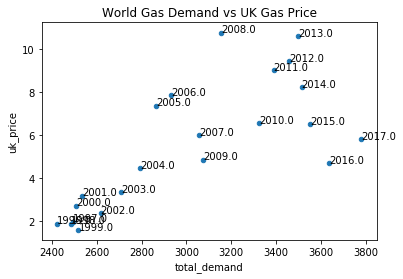

In [10]:
ax = world_gas.plot.scatter(x='total_demand', y='uk_price')
for i, txt in enumerate(world_gas.year):
    ax.annotate(txt, (world_gas.total_demand.iat[i],world_gas.uk_price.iat[i]))
plt.title('World Gas Demand vs UK Gas Price')
plt.show()

## World Gas Price vs Demand and Supply

In [11]:
world_gas_sdp = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/data/raw/fuel/supply_demand/worldwide_gas_consumption.csv')
world_gas_sdp.head()

,year,demand,production,price
0,units,Billion cubic metres,Billion cubic metres,US dollars per million Btu
1,source,BP Statistical Review of World Energy June 2018,BP Statistical Review of World Energy June 2019,BP Statistical Review of World Energy June 2020
2,1965,630.6370076,NaN,NaN
3,1966,687.1686791,NaN,NaN
4,1967,737.7525476,NaN,NaN


In [12]:
world_gas_sdp = world_gas_sdp[world_gas_sdp.year!='units']
world_gas_sdp = world_gas_sdp[world_gas_sdp.year!='source']
world_gas_sdp.head()

,year,demand,production,price
2,1965,630.6370076,NaN,NaN
3,1966,687.1686791,NaN,NaN
4,1967,737.7525476,NaN,NaN
5,1968,804.6478672,NaN,NaN
6,1969,883.5591838,NaN,NaN


In [13]:
world_gas_sdp_rem_na = world_gas_sdp.dropna()
world_gas_sdp_float = world_gas_sdp_rem_na.apply(lambda x: pd.to_numeric(x), axis=1)
world_gas_sdp_float.head()

,year,demand,production,price
33,1996.0,2214.341796,2191.935703,1.87
34,1997.0,2208.205319,2192.749234,1.96
35,1998.0,2248.593806,2249.683017,1.86
36,1999.0,2310.757158,2314.303907,1.58
37,2000.0,2401.989227,2405.523898,2.71


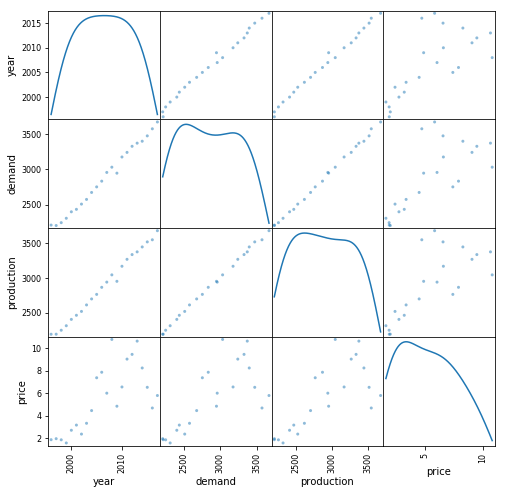

In [14]:
scatter_matrix(world_gas_sdp_float, figsize = (8, 8), diagonal = 'kde')
plt.show()

[  4.58212347e-03  -7.68477768e+00]


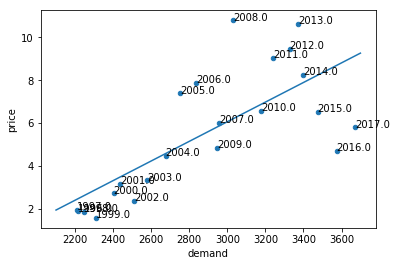

In [15]:
fit = np.polyfit(world_gas_sdp_float.demand, world_gas_sdp_float.price, deg=1)
print(fit)
fit_fn = np.poly1d(fit)
x = range(2100,3700)
y = fit_fn(x)
ax = world_gas_sdp_float.plot.scatter('demand', 'price')
for i, txt in enumerate(world_gas_sdp_float.year):
    ax.annotate(txt, (world_gas_sdp_float.demand.iat[i],world_gas_sdp_float.price.iat[i]))
plt.plot(x,y)
plt.show()

In [16]:
linear_model = ols("price ~ demand", data=world_gas_sdp_float).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     23.12
Date:                Sun, 16 Dec 2018   Prob (F-statistic):           0.000107
Time:                        18:28:50   Log-Likelihood:                -46.250
No. Observations:                  22   AIC:                             96.50
Df Residuals:                      20   BIC:                             98.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.6848      2.779     -2.765      0.0

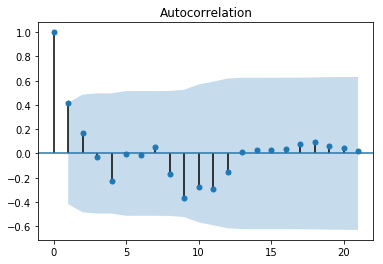

In [17]:
plot_acf(linear_model.resid)

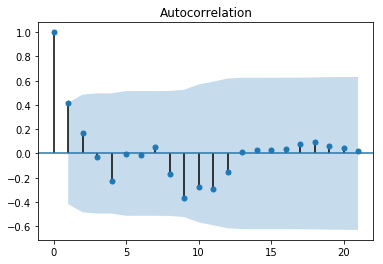

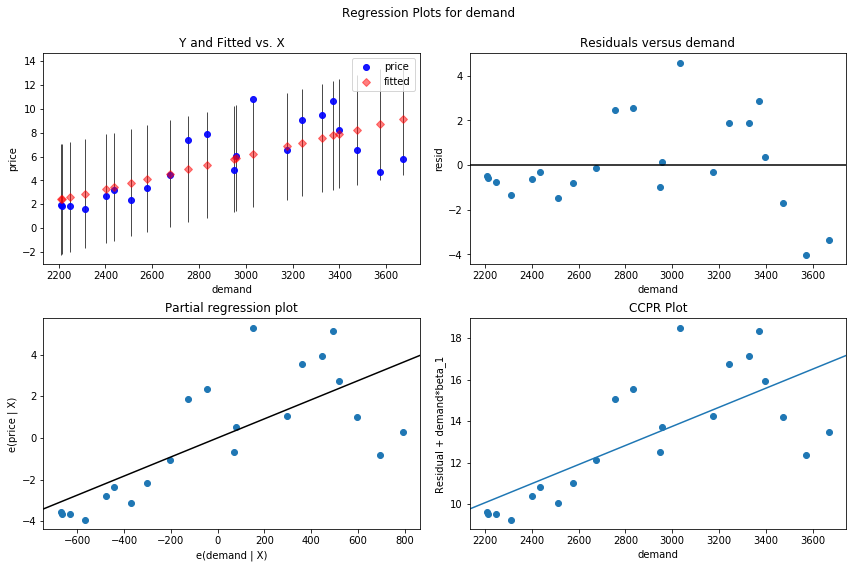

In [18]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(linear_model, 1, fig=fig)
plt.show()


Seems like there is autocorrelation between years. Maybe we can remove this autocorrelation through the inclusion of lags of demand.

## Reducing autocorrelation through 1 lag period difference for World Gas D emand vs UK Price

In [19]:
world_gas_demand_diff = world_gas_sdp_float.copy()
world_gas_demand_diff['demand_diff'] = world_gas_demand_diff['demand'].diff()
world_gas_demand_diff['price_diff'] = world_gas_demand_diff['price'].diff()
world_gas_demand_diff = world_gas_demand_diff.dropna()
world_gas_demand_diff

,year,demand,production,price,demand_diff,price_diff
34,1997.0,2208.205319,2192.749234,1.96,-6.136477,0.09
35,1998.0,2248.593806,2249.683017,1.86,40.388487,-0.10
36,1999.0,2310.757158,2314.303907,1.58,62.163352,-0.28
37,2000.0,2401.989227,2405.523898,2.71,91.232069,1.13
38,2001.0,2436.711133,2464.455142,3.17,34.721906,0.46
39,2002.0,2510.812839,2520.065774,2.37,74.101706,-0.80
40,2003.0,2576.917552,2613.287350,3.33,66.104713,0.96
41,2004.0,2675.216794,2699.547449,4.46,98.299242,1.13
42,2005.0,2753.709099,2764.900362,7.38,78.492305,2.92
43,2006.0,2834.757835,2866.538617,7.87,81.048736,0.49


[ 0.01836172 -1.08598447]


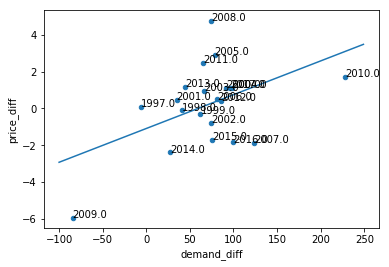

In [20]:
fit_diff = np.polyfit(world_gas_demand_diff.demand_diff, world_gas_demand_diff.price_diff, deg=1)
print(fit_diff)
fit_fn_diff = np.poly1d(fit_diff)
x = range(-100,250)
y = fit_fn_diff(x)
ax = world_gas_demand_diff.plot.scatter('demand_diff', 'price_diff')
for i, txt in enumerate(world_gas_demand_diff.year):
    ax.annotate(txt, (world_gas_demand_diff.demand_diff.iat[i],world_gas_demand_diff.price_diff.iat[i]))
plt.plot(x,y)
plt.show()

In [21]:
linear_model = ols("price_diff ~ demand_diff", data=world_gas_demand_diff).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:             price_diff   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     5.530
Date:                Sun, 16 Dec 2018   Prob (F-statistic):             0.0296
Time:                        18:28:52   Log-Likelihood:                -43.288
No. Observations:                  21   AIC:                             90.58
Df Residuals:                      19   BIC:                             92.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.0860      0.695     -1.562      

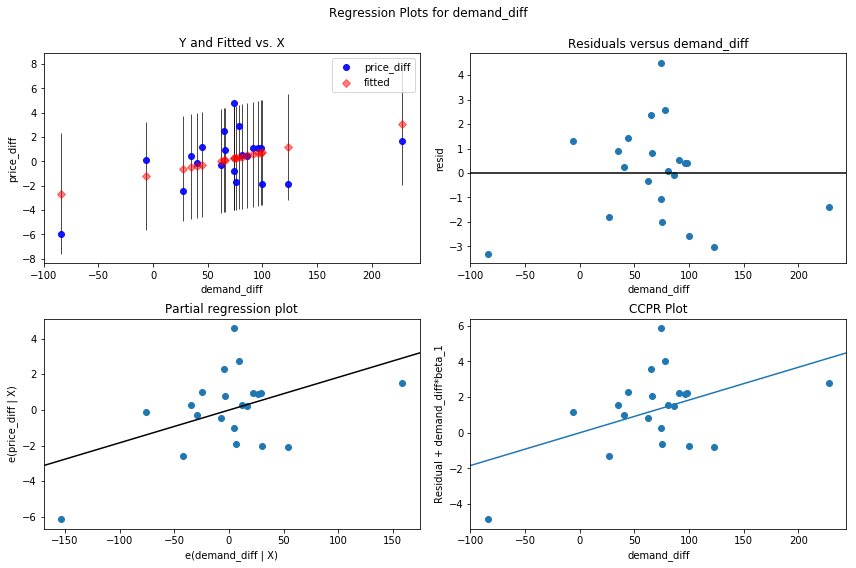

In [22]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(linear_model, 1, fig=fig)
plt.show()

## Reducing autocorrelation by introducing 2 period lag

In [23]:
world_gas_demand_diff2 = world_gas_sdp_float.copy()
world_gas_demand_diff2['demand_diff'] = world_gas_demand_diff2['demand'].diff(periods = 2)
world_gas_demand_diff2['price_diff'] = world_gas_demand_diff2['price'].diff(periods = 2)

world_gas_demand_diff2 = world_gas_demand_diff2.dropna()
world_gas_demand_diff2.head()

,year,demand,production,price,demand_diff,price_diff
35,1998.0,2248.593806,2249.683017,1.86,34.252010,-0.01
36,1999.0,2310.757158,2314.303907,1.58,102.551839,-0.38
37,2000.0,2401.989227,2405.523898,2.71,153.395421,0.85
38,2001.0,2436.711133,2464.455142,3.17,125.953975,1.59
39,2002.0,2510.812839,2520.065774,2.37,108.823612,-0.34


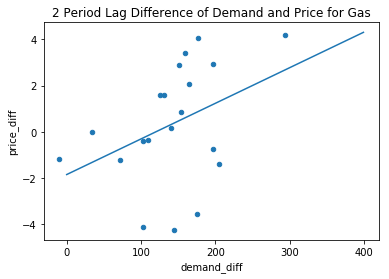

In [24]:
fit_diff2 = np.polyfit(world_gas_demand_diff2.demand_diff, world_gas_demand_diff2.price_diff, deg=1)
fit_fn_diff2 = np.poly1d(fit_diff2)
x = range(0,400)
y = fit_fn_diff2(x)
ax = world_gas_demand_diff2.plot.scatter('demand_diff', 'price_diff')
# for i, txt in enumerate(world_gas_sdp_float.year):
#     ax.annotate(txt, (world_gas_demand_diff2.demand_diff.iat[i],world_gas_demand_diff2.price.iat[i]))
plt.title('2 Period Lag Difference of Demand and Price for Gas')
plt.plot(x,y)
plt.show()

In [25]:
linear_model_diff2 = ols("price_diff ~ demand_diff", data=world_gas_demand_diff2).fit()
print(linear_model_diff2.summary())

                            OLS Regression Results                            
Dep. Variable:             price_diff   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     3.297
Date:                Sun, 16 Dec 2018   Prob (F-statistic):             0.0861
Time:                        18:28:54   Log-Likelihood:                -44.898
No. Observations:                  20   AIC:                             93.80
Df Residuals:                      18   BIC:                             95.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.8418      1.313     -1.403      

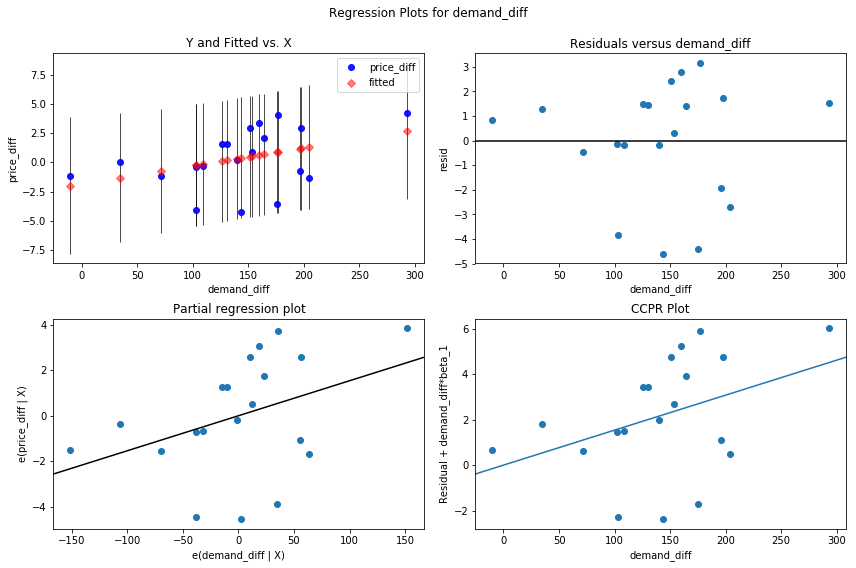

In [26]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(linear_model_diff2, 1, fig=fig)
plt.show()

In [27]:
fig = sm.graphics.plot_regress_exog(linear_model_diff2, 1, fig=fig)
plt.show()

/Users/b1017579/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


## Bayesian Linear Regression for Gas Demand vs Price 

In [28]:
formula = 'price ~ demand'

In [29]:
with pm.Model() as normal_model:
    # Prior is sampled from a normal distribution.
    family = pm.glm.families.Normal()
    pm.GLM.from_formula(formula, data = world_gas_sdp_float, family = family)
    normal_trace = pm.sample(draws=10000, chains = 2, tune = 1000, njobs=-1, target_accept=0.9, cores = 3)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, demand, Intercept]
100%|██████████| 11000/11000 [03:22<00:00, 50.83it/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.923944166058, but should be close to 0.8. Try to increase the number of tuning steps.


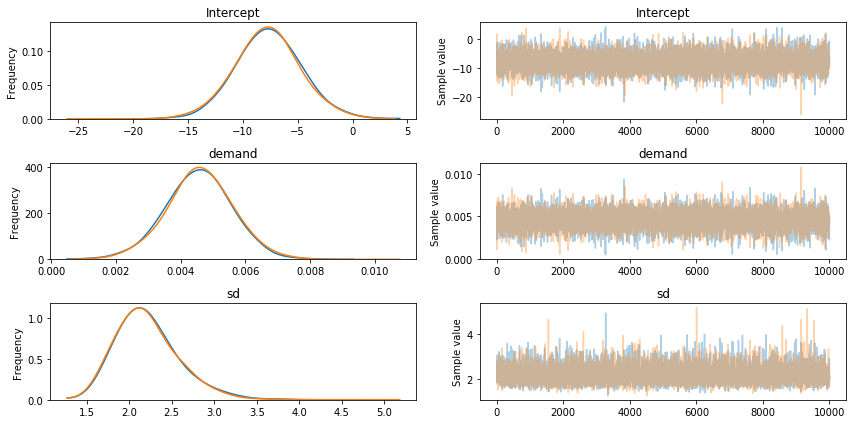

In [30]:
pm.traceplot(normal_trace)
plt.show()

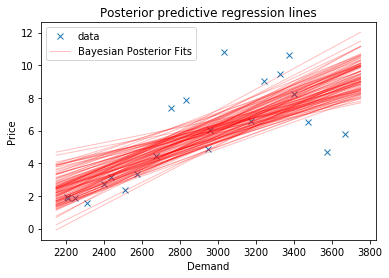

In [31]:
plt.figure()
plt.plot(world_gas_sdp_float.demand, world_gas_sdp_float.price, 'x', label='data')
pm.plot_posterior_predictive_glm(normal_trace, samples = 100, eval=np.linspace(2150, 3750, 100), linewidth = 1, 
                                 color = 'red', alpha = 0.25, label = 'Bayesian Posterior Fits',
                                lm = lambda x, sample: sample['Intercept'] + sample['demand'] * x);
plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('Demand')
plt.ylabel('Price')
plt.show()

Let's see if we can plot the credible region from the posterior distributions.

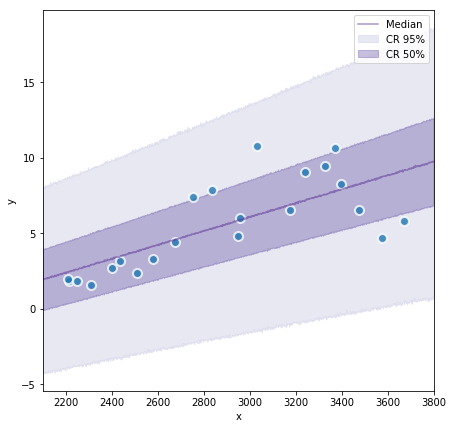

In [32]:
# Function which plots the credible region of a bayesian linear regression
def plot_posterior_cr(trc, rawdata, x, xlims, npoints=1000):  
    '''
    Convenience fn: plot the posterior predictions from mdl given trcs
    '''

    ## extract traces
    trc_mu = pm.trace_to_dataframe(trc)[['Intercept',x]]
    trc_sd = pm.trace_to_dataframe(trc)['sd']
    ## recreate the likelihood
    x = np.linspace(xlims[0], xlims[1], npoints).reshape((npoints,1))
    X = x ** np.ones((npoints,2)) * np.arange(2)
    like_mu = np.dot(X,trc_mu.T)+trc_mu['Intercept'].mean()
    like_sd = np.tile(trc_sd.T,(npoints,1))
    like = np.random.normal(like_mu, like_sd)

    ## Calculate credible regions and plot over the datapoints
    dfp = pd.DataFrame(np.percentile(like,[2.5, 25, 50, 75, 97.5], axis=1).T
                         ,columns=['025','250','500','750','975'])
    dfp['x'] = x

    pal = sns.color_palette('Purples')
    f, ax1d = plt.subplots(1,1, figsize=(7,7))
    ax1d.fill_between(dfp['x'], dfp['025'], dfp['975'], alpha=0.5
                      ,color=pal[1], label='CR 95%')
    ax1d.fill_between(dfp['x'], dfp['250'], dfp['750'], alpha=0.4
                      ,color=pal[4], label='CR 50%')
    ax1d.plot(dfp['x'], dfp['500'], alpha=0.5, color=pal[5], label='Median')
    _ = plt.legend()
    _ = ax1d.set_xlim(xlims)
    _ = sns.regplot(x='x', y='y', data=rawdata, fit_reg=False
            ,scatter_kws={'alpha':0.8,'s':80, 'lw':2,'edgecolor':'w'}, ax=ax1d)


world_gas_sdp_float['x'] = world_gas_sdp_float['demand']
world_gas_sdp_float['y'] = world_gas_sdp_float['price']


plot_posterior_cr(normal_trace, world_gas_sdp_float, 'demand', [2100,3800])
plt.show()

## Bayesian Linear Regression for Differences Demand and Price 

In [33]:
formula_diff = 'price_diff ~ demand_diff'

In [34]:
with pm.Model() as normal_model:
    # Prior is sampled from a normal distribution.
    family = pm.glm.families.Normal()
    pm.GLM.from_formula(formula_diff, data = world_gas_demand_diff, family = family)
    normal_trace_diff = pm.sample(draws=20000, chains = 2, tune = 1500, njobs=-1, target_accept=0.9, cores=3)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, demand_diff, Intercept]
100%|██████████| 21500/21500 [00:33<00:00, 650.16it/s]


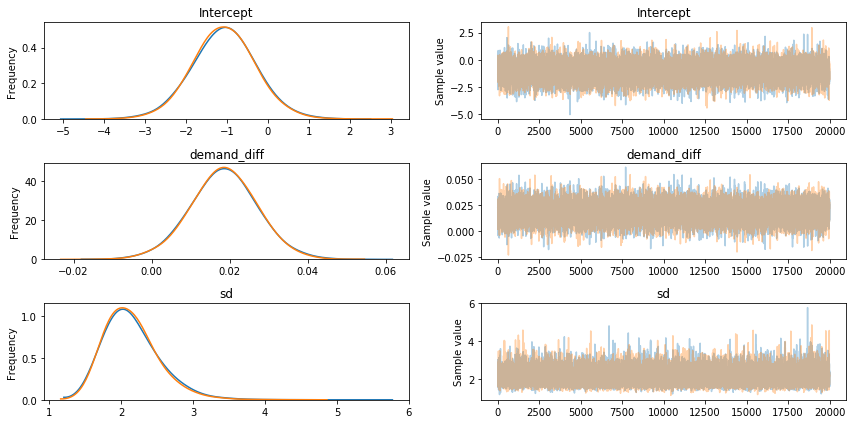

In [35]:
pm.traceplot(normal_trace_diff)
plt.show()

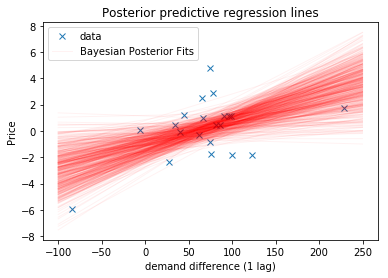

In [36]:
plt.figure()
plt.plot(world_gas_demand_diff.demand_diff, world_gas_demand_diff.price_diff, 'x', label='data')
pm.plot_posterior_predictive_glm(normal_trace_diff, samples = 500, eval=np.linspace(-100, 250, 100), linewidth = 1, 
                                 color = 'red', alpha = 0.05, label = 'Bayesian Posterior Fits',
                                lm = lambda x, sample: sample['Intercept'] + sample['demand_diff'] * x);
plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('demand difference (1 lag)')
plt.ylabel('Price')
plt.show()

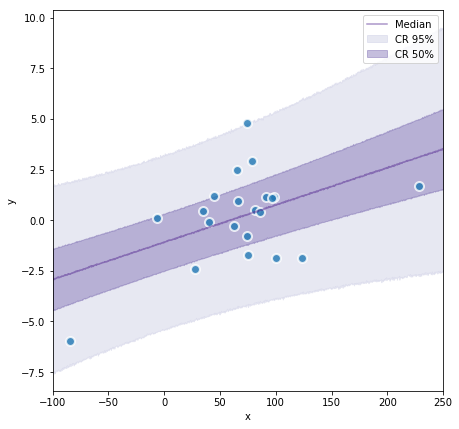

In [37]:
world_gas_demand_diff['x'] = world_gas_demand_diff['demand_diff']
world_gas_demand_diff['y'] = world_gas_demand_diff['price_diff']

plot_posterior_cr(normal_trace_diff, world_gas_demand_diff, 'demand_diff', [-100,250])
plt.title('')
plt.show()

## Bayesian Linear Regression for Two Period Lagged Demand

As we saw from the frequentist linear regression, a lagged demand of two periods reduces the autocorrelation significantly and allows us to model demand and price. We will now try to get predictions for the posterior distribution.

In [38]:
formula_diff_2 = 'price_diff ~ demand_diff'

In [39]:
world_gas_demand_diff2.head()

,year,demand,production,price,demand_diff,price_diff
35,1998.0,2248.593806,2249.683017,1.86,34.252010,-0.01
36,1999.0,2310.757158,2314.303907,1.58,102.551839,-0.38
37,2000.0,2401.989227,2405.523898,2.71,153.395421,0.85
38,2001.0,2436.711133,2464.455142,3.17,125.953975,1.59
39,2002.0,2510.812839,2520.065774,2.37,108.823612,-0.34


In [40]:
with pm.Model() as normal_model:
    # Prior is sampled from a normal distribution.
    family = pm.glm.families.Normal()
    pm.GLM.from_formula(formula_diff_2, data = world_gas_demand_diff2, family = family)
    normal_trace_diff2 = pm.sample(draws=20000, chains = 2, tune = 1500, njobs=-1, target_accept=0.9, cores=3)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, demand_diff, Intercept]
100%|██████████| 21500/21500 [00:35<00:00, 609.34it/s]


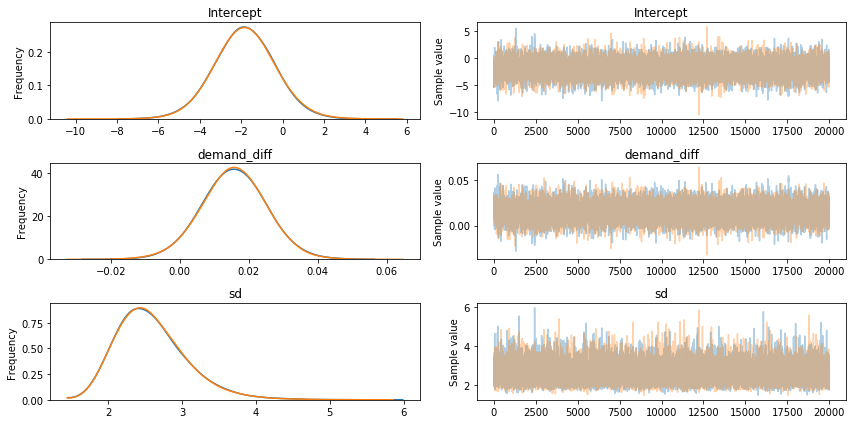

In [41]:
pm.traceplot(normal_trace_diff2)
plt.show()

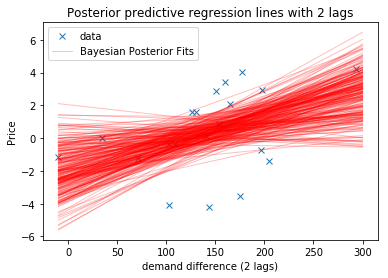

In [42]:
plt.figure()
plt.plot(world_gas_demand_diff2.demand_diff, world_gas_demand_diff2.price_diff, 'x', label='data')
pm.plot_posterior_predictive_glm(normal_trace_diff2, samples = 250, eval=np.linspace(-10, 300, 100), linewidth = 1, 
                                 color = 'red', alpha = 0.25, label = 'Bayesian Posterior Fits',
                                lm = lambda x, sample: sample['Intercept'] + sample['demand_diff'] * x);

plt.title('Posterior predictive regression lines with 2 lags')
plt.legend(loc=0)
plt.xlabel('demand difference (2 lags)')
plt.ylabel('Price')
plt.show()

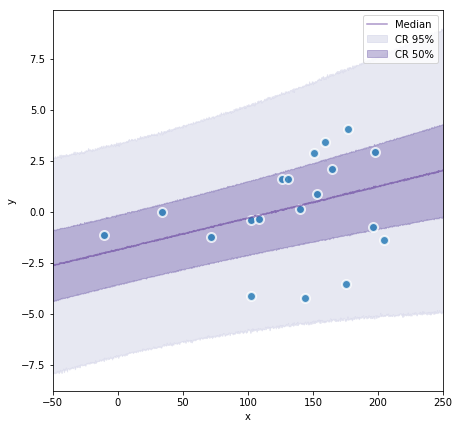

In [43]:
world_gas_demand_diff2['x'] = world_gas_demand_diff2['demand_diff']
world_gas_demand_diff2['y'] = world_gas_demand_diff2['price_diff']

plot_posterior_cr(normal_trace_diff2, world_gas_demand_diff2, 'demand_diff', [-50,250])
plt.show()